In [1]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:


print(cv2.__version__)



4.2.0


In [83]:


images_dir = r"C:\Users\user\Desktop\NumberPlate"
image_files = os.listdir(images_dir)



In [84]:
image_path = "{}/{}".format(images_dir, "gari.jpg")

In [85]:
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [86]:


def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)



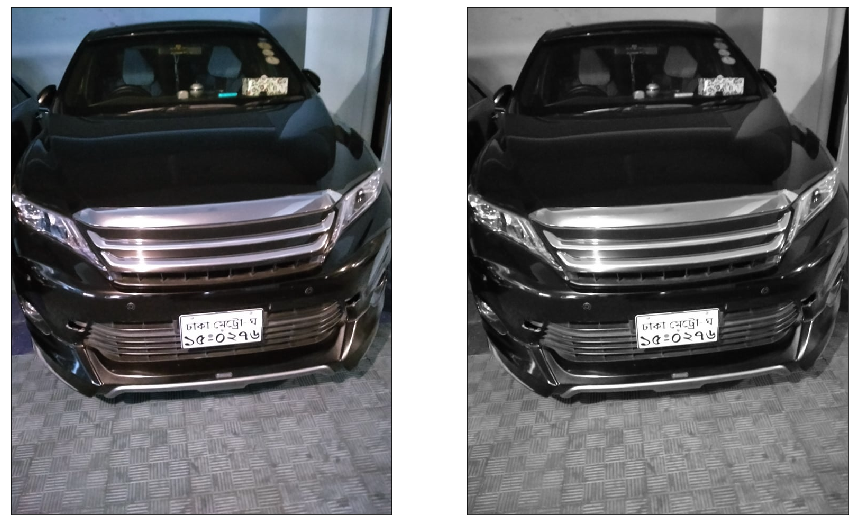

In [87]:
plot_images(image, gray)

In [88]:
blur = cv2.bilateralFilter(gray, 11,90, 90)

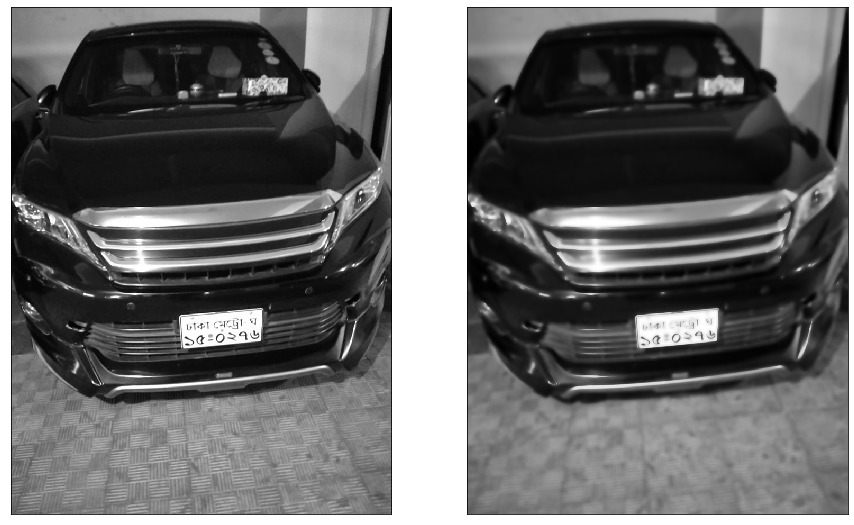

In [89]:


plot_images(gray, blur)



In [90]:


edges = cv2.Canny(blur, 30, 200)



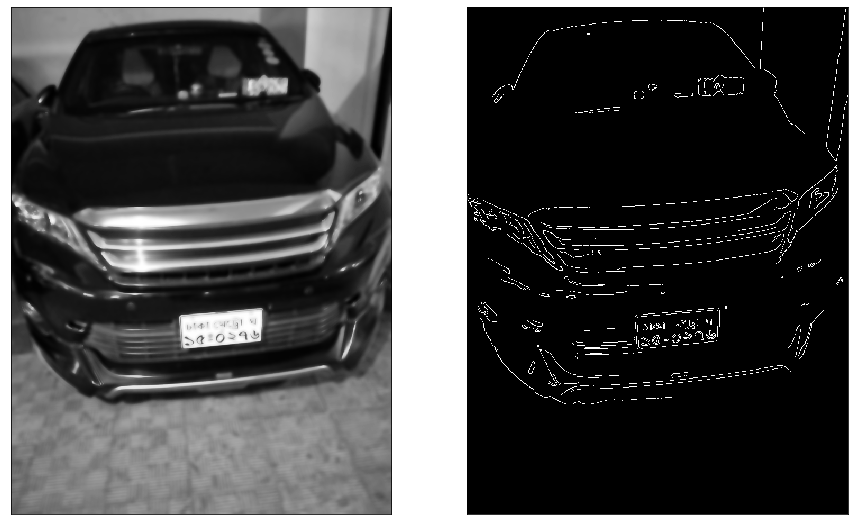

In [91]:
plot_images(blur, edges)

In [92]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [93]:


image_copy = image.copy()



In [94]:


_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)



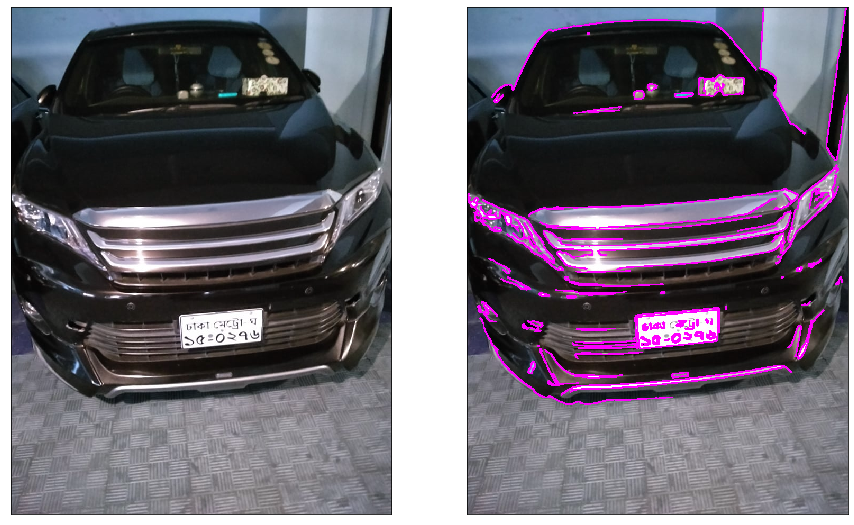

In [95]:
plot_images(image, image_copy)

In [96]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:50]

In [97]:


image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)



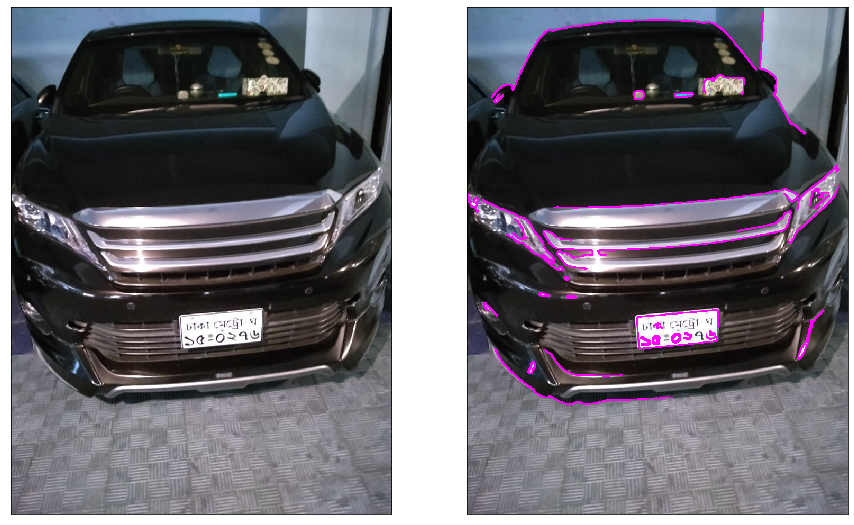

In [98]:
plot_images(image, image_copy)

In [99]:


plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plat.png", plate)



True

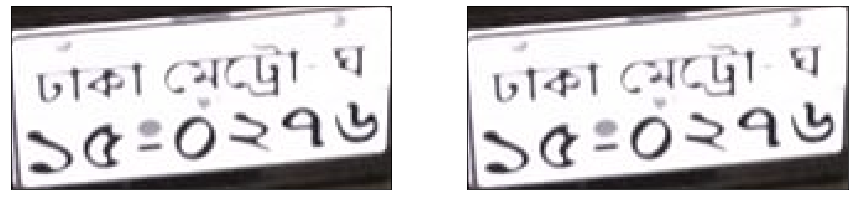

In [100]:
plot_images(plate, plate)